<a href="https://colab.research.google.com/github/mkorlyakova/MSTU-courses/blob/main/ML%20magister/8/ML_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Решающие деревья



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Решающие деревья

Деревья строятся последовательно от корня к листьям (так называемый "жадный" способ):
  - Выбирается корень и критерий, по которому выборка разбивается на две. 
  - То же самое делается для каждого из потомков этого корня и так далее до достаточного уровня ветвления. 
  
  Критичные задачи:
    - Выбор способа **разбиения каждого из узлов**, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.
    - Назначить критерий останова
    - Определить способ привязывания оценки терминального узла

### Разбиение в узле
**Разбиение** выбирается с точки зрения заранее заданного функционала качества $Q(X, j, t)$. Находятся наилучшие значения $j$ и $t$ для создания _предиката_ $[x^{j}<t]$. **Параметры $j$ и $t$ можно выбирать перебором:** признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения на две подвыборки, таким образом, различных значений параметра $t$ будет столько же, сколько различных значений признака $x^{j}$ в обучающей выборке.

В каждой вершине производится проверка, не выполнилось ли некоторое условие останова (критерии останова рассмотрим далее), и если оно выполнилось, разбиение прекращается, и вершина объвляется листом, и он будет содержать прогноз.


## **Классификация: **

 критерий информативности:

**1)** Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$

$p_{k}$ будет характеризовать вероятность выдачи класса $k$.

**2)** _Критерий Джини_ или _индекс Джини_ выглядит следующим образом:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}),$$

где $K$ - количество классов в наборе данных $X$.

Его минимум достигается когда все объекты в подмножестве относятся к одному классу, а максимум - при равном содержании объектов всех класов. Критерий информативности Джини можно интерпретировать как вероятность ошибки случайного классификатора.

**3)** Еще один критерий информативности - _энтропийный критерий_. Он также называется _энтропией Шеннона_ и записывается как

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии также достигается когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. Прирост информации есть утрата неопределенности (=уменьшение энтропии). Стоит отметить, что в формуле полагается, что $0\text{log}_{2}0=0.$ 


### Значение терминального узла. 
В задаче классификации это будет класс, к которому относится большая часть объектов из выборки в листе $X_{m}$

$$a_{m} = \text{argmax}_{y \in Y} \sum_{i \in X_{m}}[y_{i}=y]$$

или доля объектов определенного класса $k$, если требуется предсказать вероятности классов

$$a_{mk} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}[y_{i}=k].$$

В случае регрессии можно в качестве ответа давать средний по выборке в листе

$$a_{m} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}y_{i}.$$


## **Регрессия:**

В случае **регрессии** разброс будет характеризоваться дисперсией, поэтому критерий информативности будет записан в виде

$$H(X) = \frac{1}{X}\sum_{i\in X}(y_{i} - \bar{y}(X))^{2},$$

где $\bar{y}(X)$ - среднее значение ответа в выборке $X$:

$$\bar{y}(X) = \frac{1}{|X|}\sum_{i\in X}y_{i}.$$

## **Достоинства деревьев решений:**

  - Просто понять и интерпретировать. 
  - Деревья можно визуализировать.
  - Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. 
  - Стоимость использования дерева (Прогнозирования данных) является логарифмической по количеству точек данных, используемых для обучения дерева.
  - Может обрабатывать как числовые, так и категориальные данные.(реализация scikit-learn не поддерживает категориальные переменные). 
  - Способны обрабатывать проблемы с несколькими выходами.
  - Используют модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики. 
  - Возможна проверка модели с помощью статистических тестов. Это позволяет учитывать надежность модели.


## **Недостатки деревьев решений:**

  - Могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества выборок, необходимых для конечного узла, или установка максимальной глубины дерева.
  - Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
  - Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
  - Практические алгоритмы обучения дереву решений основаны на эвристических алгоритмах, таких как жадный алгоритм, в котором локально оптимальные решения принимаются в каждом узле. Такие алгоритмы не могут гарантировать возврат глобального оптимального дерева решений. Это можно смягчить путем обучения нескольких деревьев в учащемся ансамбля, где функции и образцы выбираются случайным образом с заменой.
  - Существуют концепции, которые трудно изучить, поскольку деревья решений не выражают их ( например проблемы XOR, четности или мультиплексора).

  - Рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# для красивых картинок
import seaborn as sns; sns.set()

В качестве примера рассмотрим случай задачи классификации, в которой два класса точек плохо разделены:

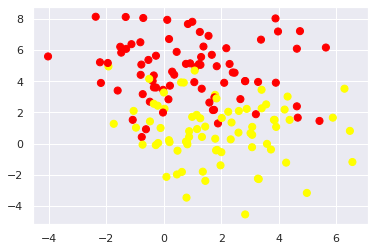

In [3]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=0, cluster_std=1.960)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Будем использовать классификатор опорных векторов Scikit-Learn для обучения решающих деревьев. 

class sklearn.tree.**DecisionTreeClassifier**( **criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, min_weight_fraction_leaf=0.0, **max_features**=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, **class_weight**=None, **ccp_alpha**=0.0)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


  Основные параметры класса sklearn.tree.DecisionTreeClassifier:

  - **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
  - **splitter**:{“best”, “random”}
  - **max_depth**: максимальная глубина дерева
  - **max_features**: максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
  - **min_samples_leaf**: минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов
  - **max_features**: int, float или {“auto”, “sqrt”, “log2”}:Ряд особенностей, которые следует учитывать при поиске лучшего сплита:

    - Если int, то учитывайте max_featuresособенности при каждом разделении.

    - Если с плавающей запятой, то max_featuresэто дробь и особенности учитываются при каждом разбиении.max(1, int(max_features * n_features_in_))

    - Если "авто", то max_features=sqrt(n_features).

    - Если «sqrt», то max_features=sqrt(n_features).

    - Если «log2», то max_features=log2(n_features).

    - Если None, то max_features=n_features.

  - **class_weight**: dict, list(словари) или  “balanced”: Веса, связанные с классами в форме . Если None, предполагается, что все классы имеют вес один. Для задач с несколькими выходами список словарей может быть предоставлен в том же порядке, что и столбцы y.{class_label: weight}


  - **ccp_alpha**: Параметр сложности, используемый для сокращения минимальной стоимости-сложности. ccp_alphaБудет выбрано поддерево с наибольшей сложностью стоимости, меньшей чем . По умолчанию обрезка не выполняется.

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации.


Соберем дерево из "коробки":



In [4]:
from sklearn import tree
from sklearn.model_selection import train_test_split



clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Отобразим результат:

In [46]:
def plot_dt_decision_function(model, ax=None, plot_support=True, class_numb = 2, n_feat = 2, b = 1.):
    """Plot the decision function for a 2D DT"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # сетка примеров для оценки значений в точках пространства
    n30 = 200 # точность визуализации
    x = np.linspace(xlim[0], xlim[1], n30)
    y = np.linspace(ylim[0], ylim[1], n30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]+[np.ones(n30**2).ravel()*b]*(n_feat-2)).T
    print(xy[[1,100,100, 1000],:])
    P = model.predict_proba(xy)[:,1]
    print(P[[1,100,100, 1000]])
    P =P.reshape(X.shape)
    
    
    # отрисуем поля  (по уровням )
      
    lev = [0.5*k for k in range((class_numb-1)*2+1)]
    #  Создаем массив RGB цветов каждой области:
    color_region = np.zeros(((class_numb-1)*2+1, 3))
    color_region[:, :-1] = 0.4
    color_region[:, 2] = np.linspace(0, 1, (class_numb-1)*2+1)
    
    ax.contourf(X, Y, P,
            levels = lev,
            colors = color_region, alpha = 0.5)
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

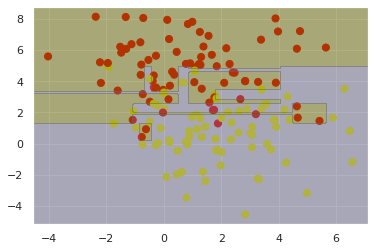

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_dt_decision_function(clf, class_numb = 2);

После обучения вы можете построить дерево с помощью plot_tree функции:

[Text(0.49074074074074076, 0.95, 'node #0\nX[1] <= 2.591\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(0.2037037037037037, 0.85, 'node #1\nX[1] <= 1.28\ngini = 0.25\nsamples = 50.0%\nvalue = [0.147, 0.853]'),
 Text(0.1111111111111111, 0.75, 'node #2\nX[0] <= -0.446\ngini = 0.083\nsamples = 30.7%\nvalue = [0.043, 0.957]'),
 Text(0.07407407407407407, 0.65, 'node #3\nX[0] <= -0.864\ngini = 0.48\nsamples = 3.3%\nvalue = [0.4, 0.6]'),
 Text(0.037037037037037035, 0.55, 'node #4\ngini = 0.0\nsamples = 1.3%\nvalue = [0.0, 1.0]'),
 Text(0.1111111111111111, 0.55, 'node #5\nX[1] <= 0.176\ngini = 0.444\nsamples = 2.0%\nvalue = [0.667, 0.333]'),
 Text(0.07407407407407407, 0.45, 'node #6\ngini = 0.0\nsamples = 0.7%\nvalue = [0.0, 1.0]'),
 Text(0.14814814814814814, 0.45, 'node #7\ngini = 0.0\nsamples = 1.3%\nvalue = [1.0, 0.0]'),
 Text(0.14814814814814814, 0.65, 'node #8\ngini = 0.0\nsamples = 27.3%\nvalue = [0.0, 1.0]'),
 Text(0.2962962962962963, 0.75, 'node #9\nX[0] <= 4.51\ngini = 0.4

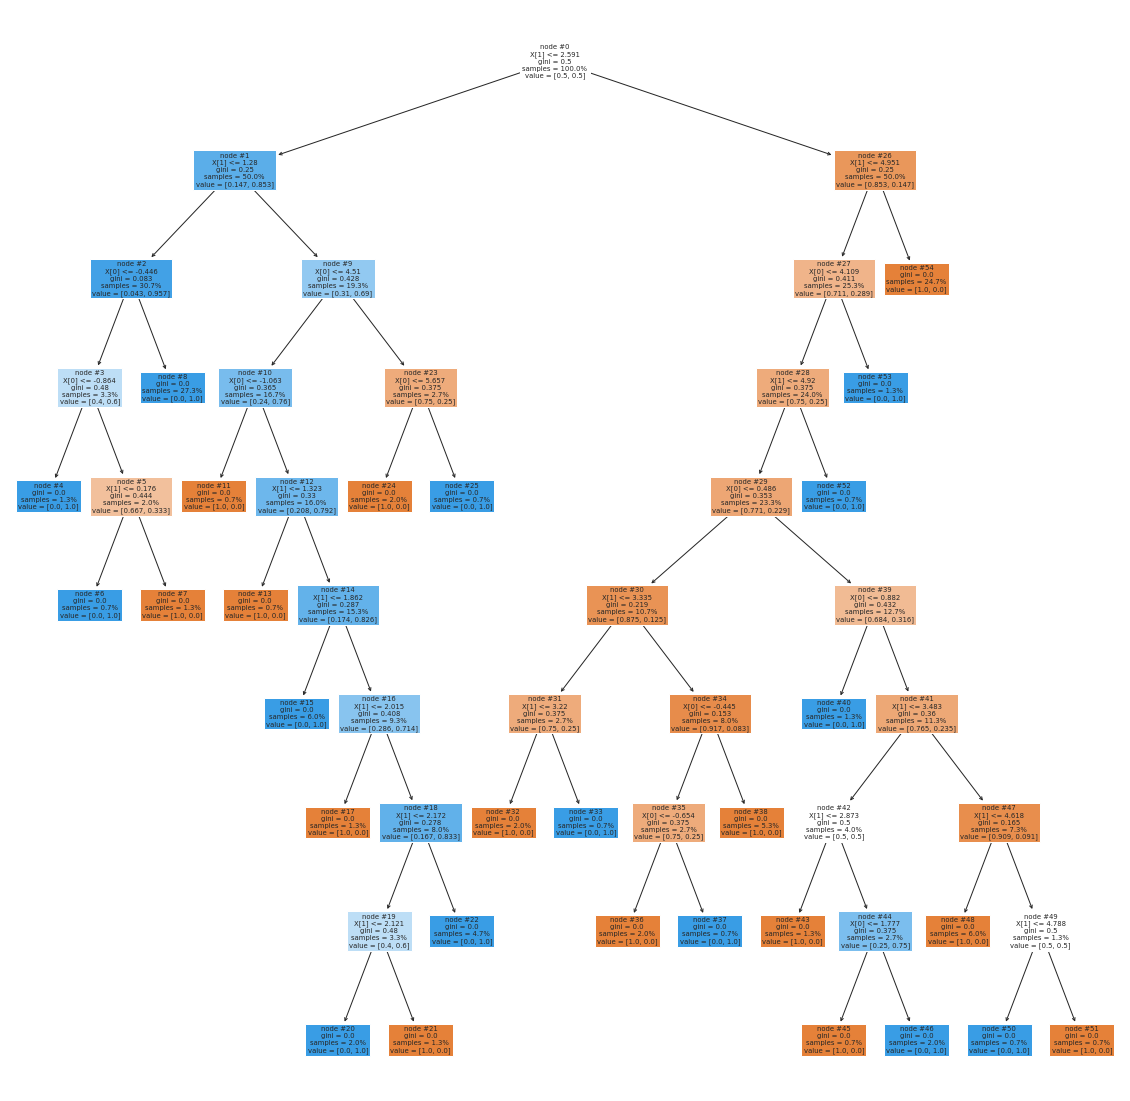

In [32]:
plt.figure(figsize = (20,20))
tree.plot_tree( clf, filled=True, node_ids = True, proportion=True)

Другая визуализация https://graphviz.readthedocs.io/en/stable/manual.html:

In [ ]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


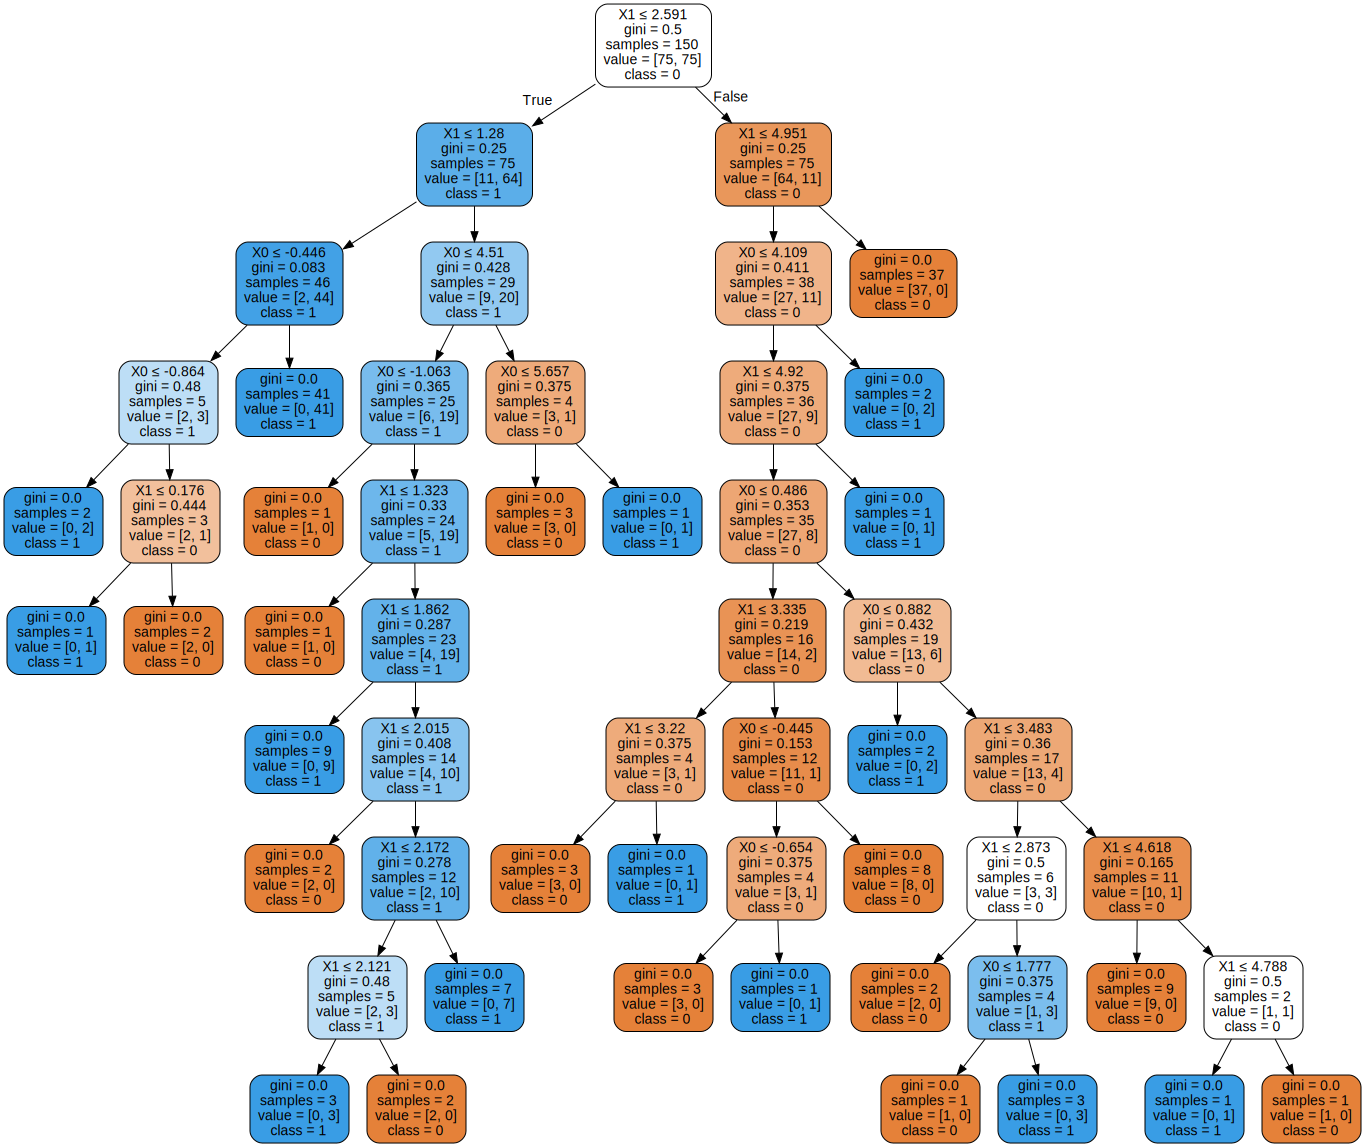

In [33]:
import graphviz
from graphviz import Digraph
 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['X0','X1'],class_names=['0','1'], filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### **Задание 1.**

1.1 Оцените визуально изменение положения гиперповерхности для числа точек в обучении N(k) в диапазоне от 10 до 500 в текущем примере для деревьев с глубиной 1,5,..., 50 . Оцените мeтрики для тестового набора: полноту, точность,roc_auc,оцените время работы модели на этапе генерации дерева и этапе получения решений (import time).

1.2 Оцените изменение гиперповерхности после нормализации (coef = coef_ / np.sum(( m1.coef_ ) ** 2) ** 0.5) используем (coef) в форме |coef(к) - coef(к-1)|/coef(k) для разных подмножеств примеров N(k). Оцените мeтрики для тестового набора: полноту, точность,roc_auc


1.3  зафиксируйте результаты в таблице и сделайте выводы

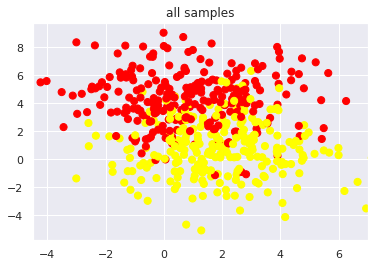

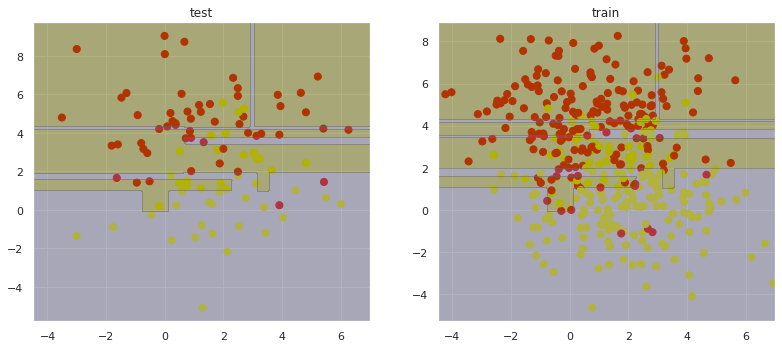

In [34]:

X, y = make_blobs( n_samples=500, centers=2,
                  random_state=0, cluster_std=1.960)
plt.title('all samples')
plt.xlim([-4.5,7])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (13.3,5.5))

plt.subplot(1,2,1)
plt.title('test')
plt.xlim([-4.5,7])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')
plt.xlim([-4.5,7])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

1.4 повторите п.1.2 для данных ниже и сделайте выводы о качестве разделения.

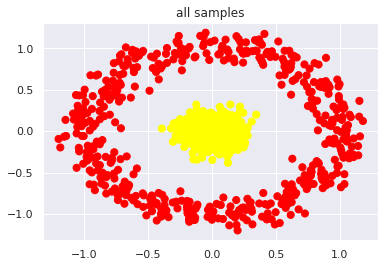

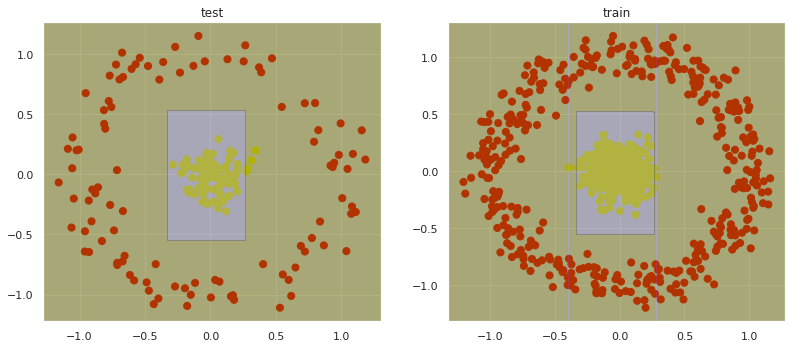

In [35]:
from sklearn.datasets import make_circles

X, y = make_circles( 1000, factor=0.1, noise=0.1) # строим не линейное пространство примеров 
plt.title('all samples')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

Оцениваем качество от глубины и числа примеров:

  1)

  2) 

...
 

### **Задание 2.**

2.1  Проведите эксперимент с изменением гиперпараметров для пространства из примера ниже:
  - max_features: 0.4,0.6, 0.8,1.0, 
  - min_samples_leaf:1,5,100 
  - splitter:“best”, “random”
  
  и оцените метрики и время.

2.2  зафиксируйте результаты в таблице и сделайте выводы


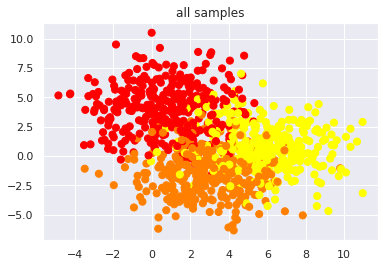

In [55]:
X, y = make_blobs(  n_samples=1000, centers=3,n_features=5,
                  random_state=0, cluster_std=2.0)
plt.title('all samples')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

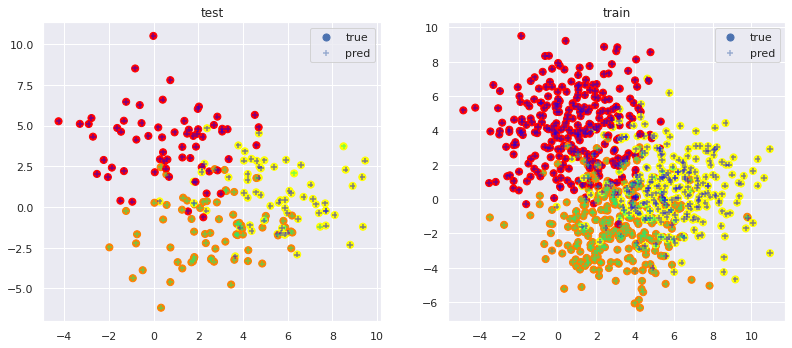

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
y_p = clf.fit(X_train, y_train).predict_proba(X_train)[:,1]
#test
y_pt = clf.predict_proba(X_test)[:,1] # предсказание вероятностной формы класса 1 (диапазон значение от 0 до 1)
y_pt_c = clf.predict(X_test) # предсказание класса (0/1)
plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pt, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_p, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])
plt.show()

Не все классы истиной и предиктивной разметки совпали в тесте (и похоже все в тренировке). Делаем оценку метрик:

In [64]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import sklearn.datasets 

In [69]:
print(classification_report(y_test, y_pt_c,
                            target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.96      1.00      0.98        70
           2       0.98      0.95      0.97        66

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



Все классы предсказаны неплохо.

## Регрессия:

Работает через похожий класс (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

  - **criterion**:{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - немного изменяем критерий для выбора разделения, остальное похоже


In [72]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
# синтетические данные
X, y = load_boston(return_X_y=True,)
regressor = DecisionTreeRegressor(max_depth=10,random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([ 0.53029023,  0.60458265, -1.51926899,  0.51623209,  0.75469785,
        0.40253574, -0.14584656,  0.40623243, -2.24152781, -0.19654443])

Строим решение как регрессию (метрики из регрессионного пула).

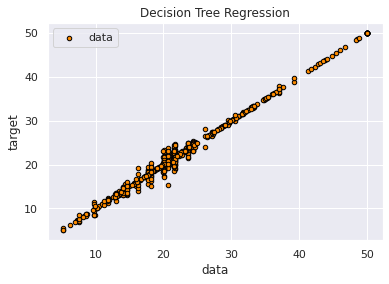

R2:  0.9904768952758077


In [74]:
regressor.fit(X,y)
y_p = regressor.predict(X)

# Plot the results
plt.figure()
n_f = 4
plt.scatter(y_p, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X[:,n_f], y_p, "+", label="max_depth=2", linewidth=2)

# покажем связь предсказанного с истиным выходом регрессии
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
# метрика регрессии (коэффициент детерминации)
print('R2: ', r2_score(y,y_p))

### **Задание 3.**

3.1. для вариантов:
  -  X, color = datasets.make_s_curve(1000 * n, random_state=0)
  -  X, color = datasets.make_s_curve(50 * n, random_state=0)
  - n - номер варианта
  
  разделить данные в пропорции 4:1 и построить решение с изменением глубины дерева от 1 до 20 и оценить коэффициент детерминации (R2)

3.2. построить график зависимоти R2(глубина дерева). Сделать вывод о качестве модели и необходимой глубине дерева   

### **Задание 4.**

Построить последовательность обработки примеров для набора "fetch_lfw_people":

 4.1. провести генерацию классификатора дерево решений для 3 вариантов:

    - изменяем глубину дерева: 1,3,5,10,20,50

    - используем варианты выбора признака для разделения как: "best" , "random"

    - изменть размер РСА (сейчас 150 компонент , проверить : 50, 100, 200 ) 

 4.2. выбрать наиболее эффективное сочетание параметров из полученных моделей по f1_score 

 4.3 провести анализ результата (метрики) и сравнить с результатом логистической регрессии

**Загрузка данных и включение в работу fetch_lfw_people**:




In [76]:
from sklearn.datasets import fetch_lfw_people # изображения лиц людей (медийно известные персоны)
faces = fetch_lfw_people(min_faces_per_person=60)  # берем 60 фотографий на персону  
print(faces.target_names)  #  покажем список полученых персон
print(faces.images.shape)  #  размеры данных (картинки 62 на 47 пикселей)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Задача представляет 8 классов, т.е. нужно использовать многоклассовую версию  SVM Classifier: SVC c 'ovr' 


Каждый пример содержит 62 * 47 пикселей - таким образом исходных ("сырых") признаков очень много. Сделаем стандартную обработку с целью понизить размерность данных (используем РСА преобразование - https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca - его особенности обсудим позднее. Пока важно, что из 62 * 47 признаков получим 150 признаков, что уже подходит для работы в пространстве примеров. где всего 1348 объектов )


Кроме того , используем механизм конвейеров обработки (пайплайны https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ). Для этого существует специализированный класс Pipeline, который позволяет объединять отдельные этапы обработки данных (преобразования и обучение ) в один общий объект. Этот общий объект можно создавать разными способами. тут используем  функцию make_pipeline, куда передаем созданные объекты преобразования данных и классификатор (pca, clf).

Визуализируем примеры из набора данных:



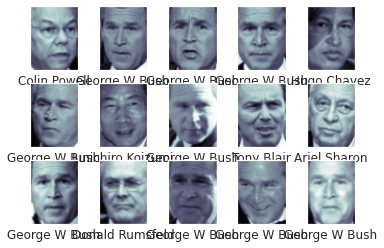

In [77]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Готовим данные для обучения и теста:

In [78]:

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline # сборка конвейера обработки.

# сделаем преобразование  
pca = PCA(n_components=150, whiten=True, random_state=42)
clf = tree.DecisionTreeClassifier (class_weight='balanced')


In [79]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

pca.fit(Xtrain)

PCA(n_components=150, random_state=42, whiten=True)

Для поиска хорошей комбинации параметров пользуемся методом **случайного** перебора случайных вариантов из списка. работает быстрее чем сеточный поиск (просмотрит заранее заданное число вариантов гиперпараметров) но не обязательно найдет лучшее сочетание (что может сделать  **сеточный поиск**).

Запустим механизм случайного поиска для формирования наиболее эффективного набора гиперпараметров алгоритм:
  
  - используем объект RandomizedSearchCV(случайный поиск https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)
  - в качестве пространства поиска зададим список параметров:
      - {'max_depth': [1, 5, 7,10,12,20, 50],
              'max_features': [0.1, 0.5, 0.7, 0.9]}


  Итогом работы этого объекта является комбинация параметров (.best_params_) с лучшей оценкой и наиболе качественная модель (.best_estimator_)
  
  Работает сравнительно быстро!!!     

In [81]:
from sklearn.model_selection import  RandomizedSearchCV  # для создания механизма random поиска.
param_grid = {'max_depth': [1, 5, 7,10,12,20, 50],
              'max_features': [0.1, 0.5, 0.7, 0.9]}
grid = RandomizedSearchCV(clf, param_grid)  # создаем объект для сеточного поиска.

%time grid.fit(pca.transform(Xtrain), ytrain)  # проводим сеточный поиск лучшей модели по гиперпараметрам
#print(grid.best_params_)  # лучшие параметры



CPU times: user 2.53 s, sys: 116 ms, total: 2.65 s
Wall time: 2.51 s


RandomizedSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': [1, 5, 7, 10, 12, 20, 50],
                                        'max_features': [0.1, 0.5, 0.7, 0.9]})

Лучшие параметры:

In [82]:
grid.best_params_

{'max_features': 0.9, 'max_depth': 10}

Проверяем качество на тестовых примерах

In [83]:
model = grid.best_estimator_  # лучшая модель по версии сеточного поиска (уже обучена в процессе сеточного поиска)
yfit = model.predict(pca.transform(Xtest))  # применяем эту модель к нашим тестам


Визуализируем тесты:

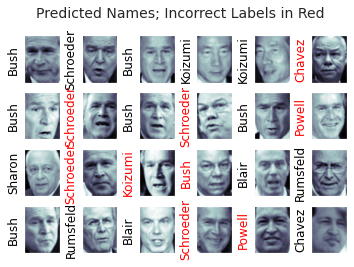

In [84]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Заодно смотрим на тренировочном наборе:

In [85]:
yfit_tr = model.predict(pca.transform(Xtrain))

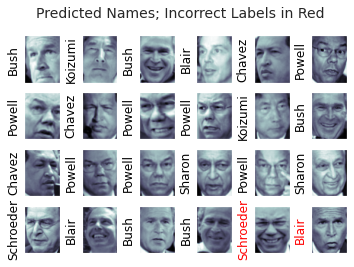

In [87]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtrain[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit_tr[i]].split()[-1],
                   color='black' if yfit_tr[i] == ytrain[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Ошибает. но значительно меньше. Посчитаем метрики.

Оцениваем результаы по всем классам на тестах:

In [88]:
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.38      0.60      0.46        15
     Colin Powell       0.50      0.44      0.47        68
  Donald Rumsfeld       0.43      0.29      0.35        31
    George W Bush       0.61      0.58      0.59       126
Gerhard Schroeder       0.19      0.30      0.23        23
      Hugo Chavez       0.24      0.20      0.22        20
Junichiro Koizumi       0.30      0.50      0.37        12
       Tony Blair       0.47      0.43      0.45        42

         accuracy                           0.46       337
        macro avg       0.39      0.42      0.39       337
     weighted avg       0.48      0.46      0.47       337



Очень слабая генерализация модели : **слишком глубокое дерево?** - проверьте , уменьшая глубину от найденого лучшего сочетания параметров: 

Строим матрицу ошибок:

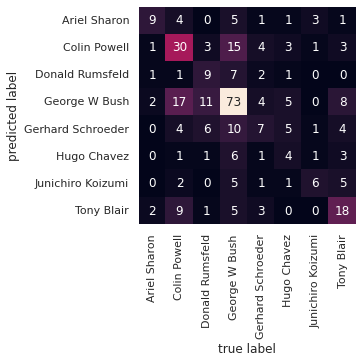

In [89]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Главная диагональ - верные классификации, а все вне этой диагонали разнородные ошибки (как оценки модели принимают один тип объектов за другой)

Что-то реально нашли только в трех классах.

### **Задание 5.**

Самостоятельно оценить данные по варианту (или любой рабочий набор данных для классификации с числом объектов больше 500):

In [90]:

V1 = sklearn.datasets.load_wine()
V2 = sklearn.datasets.load_digits()
V3 = sklearn.datasets.load_breast_cancer()
V4 = sklearn.datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = sklearn.datasets.make_blobs(n_samples=1000, centers=2, n_features=5, random_state=10)

Сравнить с результатом логистической регрессии, svm, knn.

 5.1.Загрузить данные  по варианту 

 5.2.Построить классификатор решающее дерево в формате sklearn  .
 
 5.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке
 
 5.4. сделать выводы о качестве для модели на основе выбранной метрики

 5.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке
 
 5.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.
 
 5.7 Сделать выводы о качестве модели

Вопросы для контроля:

  1. Что такое «проблема мультиколлинеарности» в задачах многомерной линейной регрессии? Возникает ли она для регрессии на деревьях.
  2. Какие критерии информативности используются при синтезе решающего дерева и почему?
  3. Достоинства и недостатки решающих деревьев.
  4. Зачем делается редукция решающих деревьев?
  5. Основная идея алгоритма СART?
  6. Как происходит перебор в жадном алгоритме синтеза дерева?
  7. Какой алгоритм строит дерево минимальной высоты?
  8. Как сказывается увеличение глубины дерева на качестве анализа новых объектов
  9. Как сократить перебор при построении дерева
  10. перечислите критерии останова